In [7]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
transform = transforms.Compose(
    [transforms.ToTensor()])
train = datasets.MNIST( root='./data', train=True, download=True, transform = transform)
train_load = DataLoader(train , batch_size = 64)
test  =  datasets.MNIST( root='./data', train=False, download=True, transform = transform)
test_load  = DataLoader(test, batch_size = 64)
print(type(train_load))

<class 'torch.utils.data.dataloader.DataLoader'>


In [8]:
# Using the toTensor change the data from 0-256 to 0-1

img, label = next(iter(train_load))
print(img[0])

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [9]:

print(img.squeeze().shape)
img = img.squeeze()
mean = torch.mean(img,dim = [1,2])
print(mean)

torch.Size([64, 28, 28])
tensor([0.1377, 0.1555, 0.0973, 0.0857, 0.1161, 0.1481, 0.0883, 0.1794, 0.0544,
        0.1096, 0.1428, 0.0713, 0.1789, 0.1423, 0.0581, 0.1265, 0.1232, 0.1356,
        0.0680, 0.0887, 0.1709, 0.1772, 0.0783, 0.0829, 0.1099, 0.2040, 0.0679,
        0.2307, 0.2084, 0.0788, 0.1276, 0.1629, 0.0879, 0.1059, 0.1826, 0.0817,
        0.1594, 0.1864, 0.1097, 0.1345, 0.0685, 0.1416, 0.0632, 0.0901, 0.0860,
        0.1208, 0.1160, 0.1123, 0.0860, 0.1649, 0.0938, 0.2278, 0.1398, 0.0841,
        0.1180, 0.1619, 0.2095, 0.1004, 0.1698, 0.0842, 0.1473, 0.0907, 0.1516,
        0.2313])


<function matplotlib.pyplot.show(close=None, block=None)>

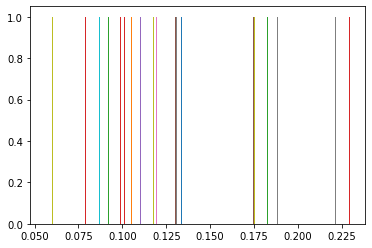

In [10]:
import matplotlib.pyplot as plt
plt.hist(mean)
plt.show

torch.Size([28, 28])
tensor([ 0.0000,  1.0370,  2.0741,  3.1111,  4.1481,  5.1852,  6.2222,  7.2593,
         8.2963,  9.3333, 10.3704, 11.4074, 12.4444, 13.4815, 14.5185, 15.5556,
        16.5926, 17.6296, 18.6667, 19.7037, 20.7407, 21.7778, 22.8148, 23.8519,
        24.8889, 25.9259, 26.9630, 28.0000])
28


c:\Users\mozhd\anaconda3\envs\mlfairness\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


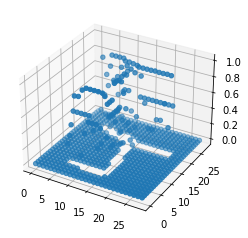

"\nax = plt.axes(projection='3d')\n\nax.plot_surface(X,Y,img[0], rstride=1, cstride=1,\n                cmap='viridis', edgecolor='none');\n\n"

In [11]:
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')
print(img[1].shape)
X = torch.linspace(0,28,steps = 28)
print(X)

Y = torch.linspace(0,28,steps = 28)
X, Y = torch.meshgrid(X, Y)
Z  = img[2]  
print(len(Z))
ax.scatter(X,Y,Z) # plot the point (2,3,4) on the figure

plt.show()

"""
ax = plt.axes(projection='3d')

ax.plot_surface(X,Y,img[0], rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

"""

In [12]:
train_load = DataLoader(train , batch_size = 1024)
img, label = next(iter(train_load))

In [13]:
img = img.squeeze();
#torch.cat(img, label)
print(label)
index = torch.argsort(label)
label = label[index]
print(label)
img = img[index]


tensor([5, 0, 4,  ..., 3, 7, 7])
tensor([0, 0, 0,  ..., 9, 9, 9])


torch.Size([95, 28, 28])
torch.Size([95])


(array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],


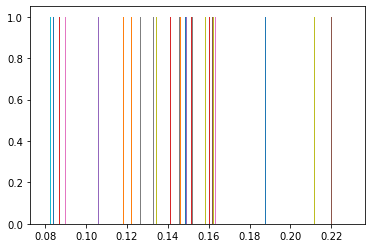

In [14]:
temp = img[label == 3,:, :] 
temp = temp.squeeze()
print(temp.shape)
meanDigit = torch.mean(temp, [1,2])
print(meanDigit.shape)
plt.hist(meanDigit)
# get the mean of all zero's 
# and then plot it. 
# I will have 10 histogram. 

# I then needs to show all of them together. 

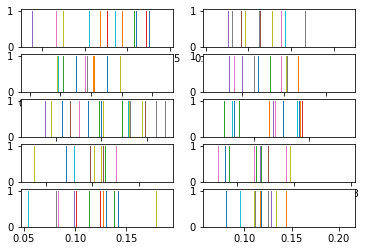

In [15]:
"""
temp = img[label == 3,:, :] 
temp = temp.squeeze()
print(temp.shape)
meanDigit = torch.mean(temp, [1,2])
print(meanDigit.shape)
plt.hist(meanDigit)
"""
fig, ax = plt.subplots(5,2)
ax[0,0].hist(torch.mean(img[label == 0,:,:], [1,2]) )
ax[1,0].hist(torch.mean(img[label == 1,:,:], [1,2]) )
ax[2,0].hist(torch.mean(img[label == 2,:,:], [1,2]) )
ax[3,0].hist(torch.mean(img[label == 3,:,:], [1,2]) )
ax[4,0].hist(torch.mean(img[label == 4,:,:], [1,2]) )

ax[0,1].hist(torch.mean(img[label == 5,:,:], [1,2]) )
ax[1,1].hist(torch.mean(img[label == 6,:,:], [1,2]) )
ax[2,1].hist(torch.mean(img[label == 7,:,:], [1,2]) )
ax[3,1].hist(torch.mean(img[label == 8,:,:], [1,2]) )
ax[4,1].hist(torch.mean(img[label == 9,:,:], [1,2]) )
plt.show()


In [27]:
train_load = DataLoader(train , batch_size = 64)
img, label = next(iter(train_load))
img = img.squeeze()
print(img.shape)
mean = torch.mean(img, [1,2])
print(img.shape)
print(mean.shape)
#division = img/mean
for i in range(img.shape[0]):
    img[i,:,:] = torch.div(img[i,:,:],mean[i])
    

torch.Size([64, 28, 28])
torch.Size([64, 28, 28])
torch.Size([64])


tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])
